<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/2_Classifica%C3%A7%C3%A3o_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação

A Classificação é uma subárea do Machine Learning que atribui uma classe para uma nova observação a partir de diversas características/variáveis de observações passadas. Essa classificação pode ser binária (duas classes, 1 ou 0) ou multiclasse (três ou mais classes).

## Base de Dados IRIS

O conjunto de dados flor Iris ou conjunto de dados Iris de Fisher é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos, como um exemplo de análise discriminante linear. Às vezes, é chamado de conjunto de dados da íris de Anderson porque Edgar Anderson coletou os dados para quantificar a variação morfológica das flores da íris de três espécies relacionadas. Duas das três espécies foram coletadas na Península de Gaspé, "todas do mesmo campo, colhidas no mesmo dia e medidas ao mesmo tempo pela mesma pessoa com a mesma aparelho".

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante linear para distinguir as espécies umas das outras.

# Bibliotecas

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Carregar o dataset

In [53]:
iris=pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/machine_learning/main/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [54]:
iris.shape

(150, 5)

In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

# Dividindo o dataset

In [58]:
X = iris.drop(['variety'], axis=1)
y = iris['variety']
print(f'X tamanho: {X.shape} | y tamanho: {y.shape} ')

X tamanho: (150, 4) | y tamanho: (150,) 


# Dividindo em Treino e Teste 

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Criação do Modelo de Machine Learning

In [60]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
arvore.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Previsões e cálculo de Acurácia

In [61]:
# Predict Accuracy Score
from sklearn.metrics import accuracy_score
y_pred = arvore.predict(X_test)
print("Acurácia dos dados de Treinamento:",accuracy_score(y_true = y_train, y_pred=arvore.predict(X_train)))
print("Acurácia dos dados de Teste:",accuracy_score(y_true = y_test, y_pred=y_pred))

Acurácia dos dados de Treinamento: 0.9833333333333333
Acurácia dos dados de Teste: 0.9666666666666667


# Visualizando a Árvore de Decisão

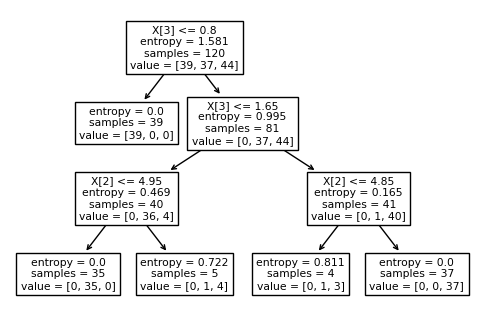

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree.plot_tree(arvore);

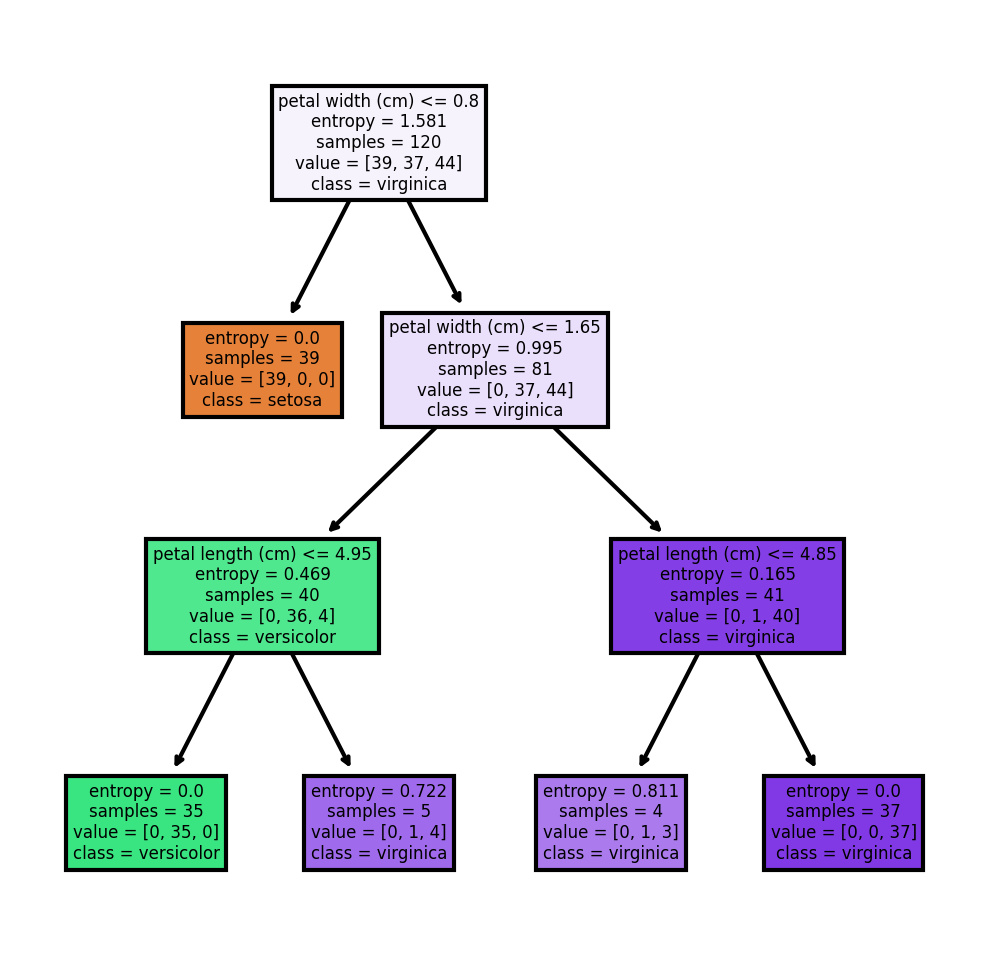

In [66]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(arvore,
           feature_names = fn, 
           class_names=cn,
           filled = True);

# Você pode salvar uma imagem da árvore de decisão
#fig.savefig('minha_arvore.png')

In [68]:
iris.head(150)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Enviando dados que o modelo nunca viu para executar as previsões

In [70]:
dados_novos = [
	[4.8,3.0,1.2,0.7],
	[6.5,2.8,4.6,1.5]]

print(arvore.predict(dados_novos))

['Setosa' 'Versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
